Dataset Summary
Dataset: truevsfakenews.csv

Size: 20,000 articles

Columns: text (article content), label (true/fake)

Class Distribution: Balanced — 10,000 true articles, 10,000 fake articles

Now let's begin building your Google Colab notebook step by step, following every instruction from your assignment and including best practices like:

Robust preprocessing

Model checkpoints and early stopping

Visualization

Precision, recall, F1-score, confusion matrix

And finally, a GUI

In [ ]:
!pip install numpy==1.23.5
!pip install gensim
!pip install jax==0.4.13
!pip install wordcloud
!pip install scikit-learn
!pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
bigframes 2.3.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
ten

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/38.6 MB 158.9 MB/s eta 0:00:01
ERROR: Operation cancelled by user
^C
^C
^C
^C


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [1]:
!pip install jax==0.4.13 jaxlib==0.4.13 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.2 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518818 sha256=1c17f5f7146cf0809114ce54a008f6982d9b0ced13dbcf8d56843a5a3be152d5
  Stored in directory: /root/.cache/pip/wheels/27/92/71/d84a9839f7b65be96d83697684a7e

In [2]:
!pip install numpy==1.23.5 --force-reinstall


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.13 which is incompatible.
chex 0.1.89 requires jaxlib>=0.4.27, but you have jaxlib 0.4.13 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but yo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

nltk.download('stopwords')
nltk.download('wordnet')


ERROR:jax._src.xla_bridge:Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 420, in discover_pjrt_plugins
    plugin_module = importlib.import_module(plugin_module_name)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_r

True

Load & Clean the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')# Load the data
df = pd.read_csv('/content/drive/MyDrive/truevsfakenews.csv')

# Encode labels
df['label'] = df['label'].map({'true': 1, 'fake': 0})  # 1 = real, 0 = fake


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text Cleaning Function

In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) # remove URLs
    text = re.sub(r'\@w+|\#','', text) # remove mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text) # remove special chars and numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,WASHINGTON (Reuters) - The Republican and Demo...,washington reuters republican democratic leade...
1,Women should get as far away from Oklahoma as ...,woman get far away oklahoma soon possible chri...
2,Another huge crowd of Americans tuned in last ...,another huge crowd american tuned last week re...
3,Donald Trump is desperate to stop the investig...,donald trump desperate stop investigation dirt...
4,"(Reuters) - Planned Parenthood, the U.S. medic...",reuters planned parenthood u medical service p...


WordCloud & Frequency Plot

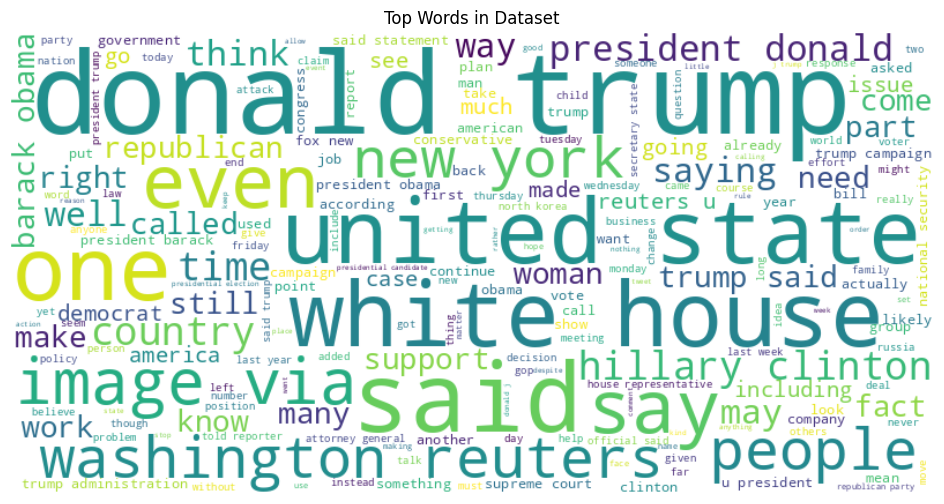

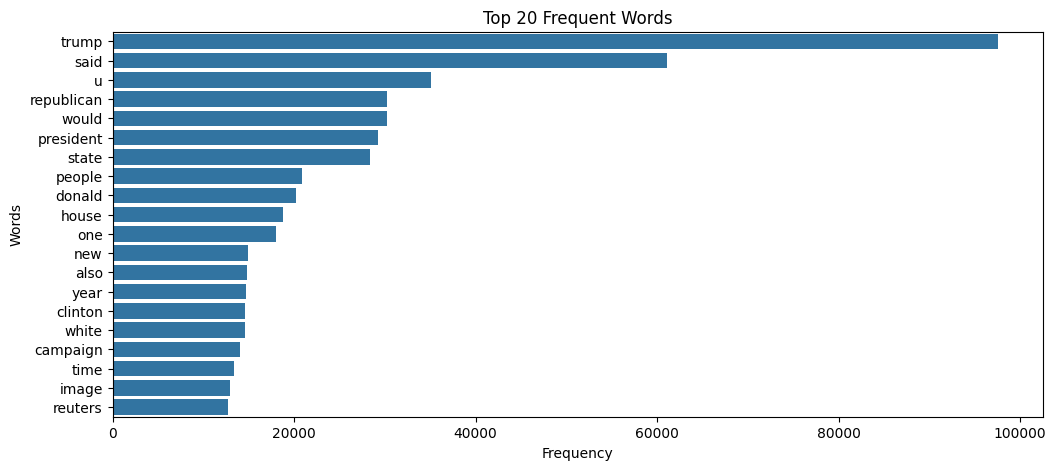

In [5]:
# WordCloud of cleaned text
text = " ".join(df['clean_text'].tolist())
plt.figure(figsize=(12,6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Dataset")
plt.show()

# Plot Most Frequent Words
from collections import Counter
all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words).most_common(20)
words, freqs = zip(*word_freq)

plt.figure(figsize=(12,5))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Top 20 Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


Tokenization and Padding

In [9]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])

# Get max length by 95th percentile
import numpy as np
max_len = int(np.percentile([len(seq) for seq in sequences], 95))

# Padding
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split data
X = padded_sequences
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Build the Simple RNN Model

In [10]:
# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
embedding_dim = 64

# Model architecture
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train.shape[1]))
model_rnn.add(SimpleRNN(64, return_sequences=False))
model_rnn.add(Dense(1, activation='sigmoid'))  # Binary classification

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

EarlyStopping & Checkpoint Setup

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = "best_model_rnn.h5"

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]


Train the Model

In [12]:
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5130 - loss: 0.6941

200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.5131 - loss: 0.6941 - val_accuracy: 0.5278 - val_loss: 0.6840
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5433 - loss: 0.6771 - val_accuracy: 0.4369 - val_loss: 0.7020
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5475 - loss: 0.6911 - val_accuracy: 0.4409 - val_loss: 0.7105
Epoch 4/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6025 - loss: 0.6511

200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6031 - loss: 0.6506 - val_accuracy: 0.7144 - val_loss: 0.5549
Epoch 5/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7227 - loss: 0.5373

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7227 - loss: 0.5373 - val_accuracy: 0.7163 - val_loss: 0.5539
Epoch 6/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7004 - loss: 0.5634

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7001 - loss: 0.5638 - val_accuracy: 0.6969 - val_loss: 0.5534
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7261 - loss: 0.5344

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7262 - loss: 0.5344 - val_accuracy: 0.7513 - val_loss: 0.5435
Epoch 8/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.5255

200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7584 - loss: 0.5255 - val_accuracy: 0.7528 - val_loss: 0.5389
Epoch 9/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7659 - loss: 0.5211

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7659 - loss: 0.5210 - val_accuracy: 0.7547 - val_loss: 0.5314
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7697 - loss: 0.5105

200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7697 - loss: 0.5105 - val_accuracy: 0.7553 - val_loss: 0.5277


Plot Training & Validation Performance

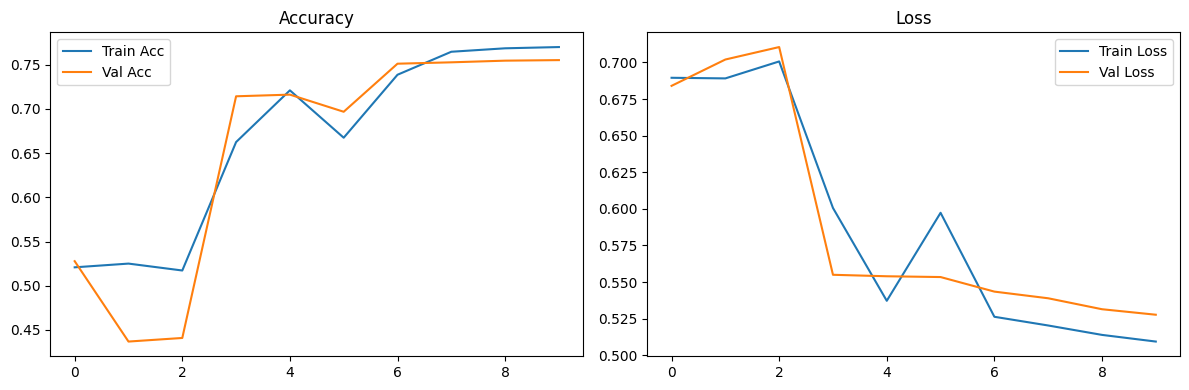

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_rnn.history['accuracy'], label='Train Acc')
plt.plot(history_rnn.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()


 Evaluation: Accuracy, Confusion Matrix, Precision, Recall, F1

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Classification Report:

              precision    recall  f1-score   support

        Fake       0.72      0.89      0.80      2055
        True       0.85      0.64      0.73      1945

    accuracy                           0.77      4000
   macro avg       0.79      0.77      0.76      4000
weighted avg       0.78      0.77      0.76      4000



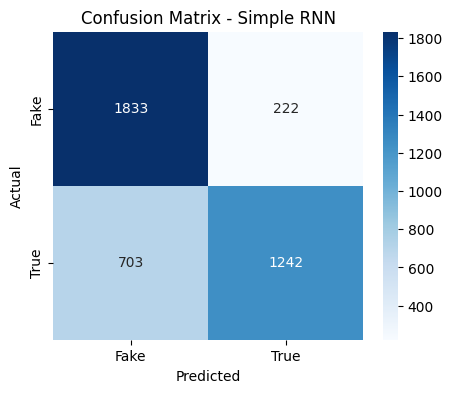

In [15]:
# Predict on test set
y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rnn, target_names=["Fake", "True"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Simple RNN")
plt.show()


#5: Model 2 – LSTM with Trainable Embedding

Build the LSTM Model

In [16]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=X_train.shape[1]))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

EarlyStopping & Checkpoint for LSTM

In [17]:
checkpoint_path_lstm = "best_model_lstm.h5"

callbacks_lstm = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path_lstm, monitor='val_loss', save_best_only=True)
]


Train the LSTM Model

In [18]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks_lstm
)


Epoch 1/10
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5264 - loss: 0.6902

200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.5266 - loss: 0.6901 - val_accuracy: 0.5403 - val_loss: 0.6716
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5403 - loss: 0.6730 - val_accuracy: 0.5278 - val_loss: 0.6773
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5329 - loss: 0.6660

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5329 - loss: 0.6660 - val_accuracy: 0.5322 - val_loss: 0.6704
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5501 - loss: 0.6597 - val_accuracy: 0.5281 - val_loss: 0.6717
Epoch 5/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5900 - loss: 0.6434

200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5909 - loss: 0.6428 - val_accuracy: 0.9406 - val_loss: 0.3099
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9579 - loss: 0.2337

200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9580 - loss: 0.2334 - val_accuracy: 0.9703 - val_loss: 0.1243
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9846 - loss: 0.0821

200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9846 - loss: 0.0821 - val_accuracy: 0.9769 - val_loss: 0.0964
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9901 - loss: 0.0497

200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9901 - loss: 0.0496 - val_accuracy: 0.9872 - val_loss: 0.0591
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9884 - loss: 0.0548 - val_accuracy: 0.9816 - val_loss: 0.0863
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9918 - loss: 0.0500 - val_accuracy: 0.9834 - val_loss: 0.0739


Plot Accuracy & Loss

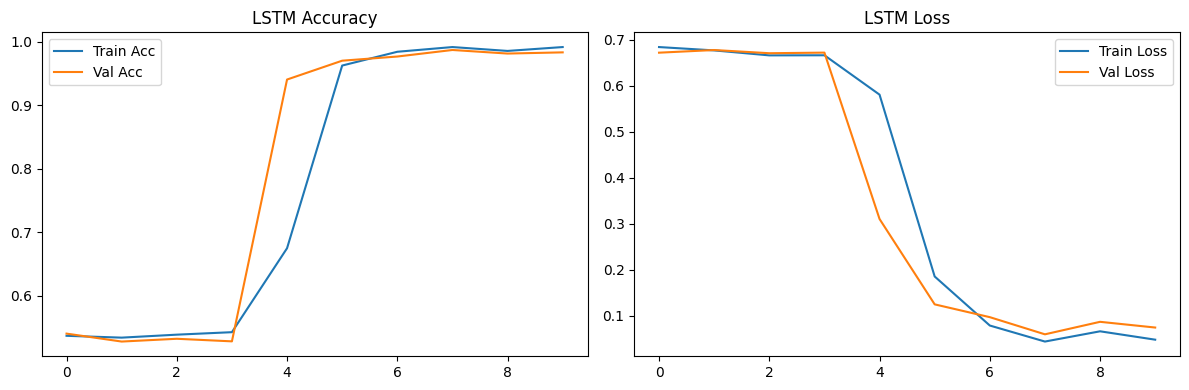

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('LSTM Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluation for LSTM Model

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Classification Report – LSTM Model:

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      2055
        True       0.98      0.99      0.99      1945

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



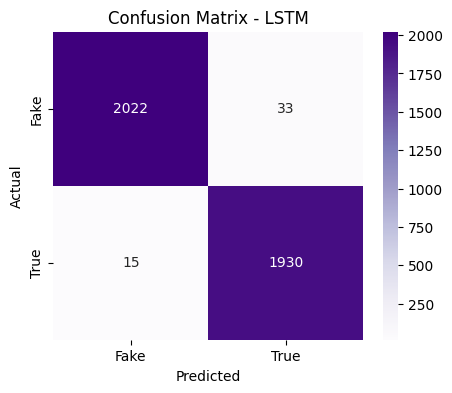

In [20]:
# Predict
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Report
print("Classification Report – LSTM Model:\n")
print(classification_report(y_test, y_pred_lstm, target_names=["Fake", "True"]))

# Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Purples', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()


#LSTM with Pretrained Word2Vec Embeddings

 Load Pretrained GloVe Word Embeddings

In [22]:
!pip install gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.13 which is incompatible.
chex 0.1.89 requires jaxlib>=0.4.27, but you have jaxlib 0.4.13 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, bu

In [23]:
import gensim.downloader as api

# Load the pretrained embedding (takes 1–2 mins)
embedding_model = api.load("glove-wiki-gigaword-100")  # You can use 50/100/200
embedding_dim = 100  # Must match the model above


[==================================================] 100.0% 128.1/128.1MB downloaded


Create the Embedding Matrix

In [24]:
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in embedding_model:
        embedding_matrix[i] = embedding_model[word]


Build LSTM with Pretrained Embedding

In [25]:
model_w2v = Sequential()
model_w2v.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=X_train.shape[1],
    trainable=False  # Freeze pretrained embeddings
))
model_w2v.add(LSTM(64))
model_w2v.add(Dense(1, activation='sigmoid'))

model_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_w2v.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │    12,885,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,885,800 (49.16 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,885,800 (49.16 MB)

Train the Model

In [26]:
checkpoint_path_w2v = "best_model_w2v.h5"

callbacks_w2v = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path_w2v, monitor='val_loss', save_best_only=True)
]

history_w2v = model_w2v.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks_w2v
)


Epoch 1/10
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5687 - loss: 0.6697

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5688 - loss: 0.6696 - val_accuracy: 0.5337 - val_loss: 0.6755
Epoch 2/10
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5411 - loss: 0.6702

200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5417 - loss: 0.6698 - val_accuracy: 0.8188 - val_loss: 0.4480
Epoch 3/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8159 - loss: 0.4432

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8161 - loss: 0.4430 - val_accuracy: 0.8931 - val_loss: 0.3327
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6519 - loss: 0.6575 - val_accuracy: 0.5622 - val_loss: 0.6673
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6037 - loss: 0.6461 - val_accuracy: 0.9013 - val_loss: 0.3501
Epoch 6/10
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7480 - loss: 0.5133

200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7481 - loss: 0.5128 - val_accuracy: 0.9094 - val_loss: 0.2789
Epoch 7/10
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9012 - loss: 0.2688

200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9013 - loss: 0.2686 - val_accuracy: 0.9275 - val_loss: 0.2513
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9265 - loss: 0.2433 - val_accuracy: 0.7044 - val_loss: 0.8047
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6608 - loss: 0.5965 - val_accuracy: 0.8519 - val_loss: 0.3568
Epoch 10/10
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8648 - loss: 0.3338

200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8651 - loss: 0.3334 - val_accuracy: 0.9184 - val_loss: 0.2497


Plot Accuracy & Loss

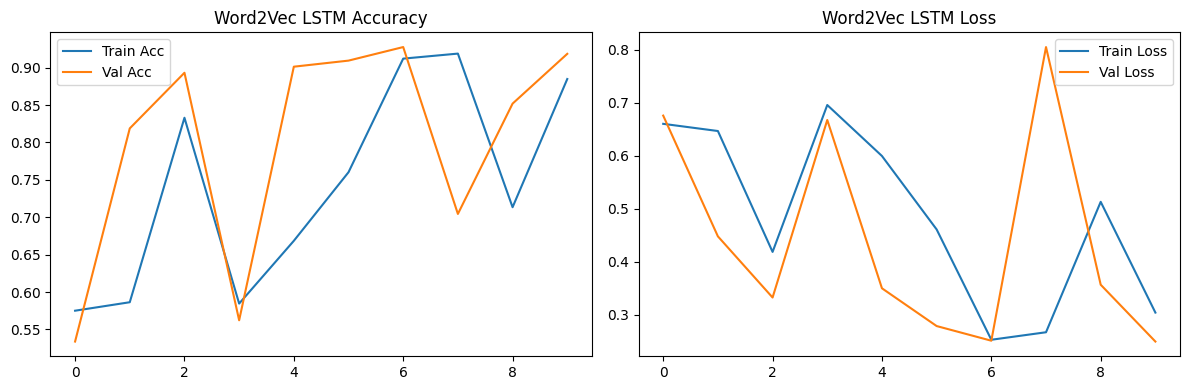

In [27]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_w2v.history['accuracy'], label='Train Acc')
plt.plot(history_w2v.history['val_accuracy'], label='Val Acc')
plt.title('Word2Vec LSTM Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_w2v.history['loss'], label='Train Loss')
plt.plot(history_w2v.history['val_loss'], label='Val Loss')
plt.title('Word2Vec LSTM Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluation for Word2Vec LSTM

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report – LSTM + Word2Vec:

              precision    recall  f1-score   support

        Fake       0.99      0.85      0.91      2055
        True       0.86      0.99      0.92      1945

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.93      0.92      0.92      4000



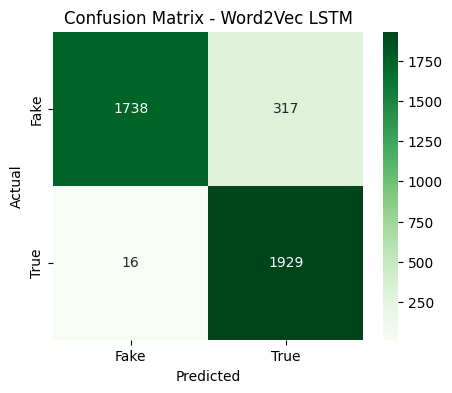

In [28]:
y_pred_w2v = (model_w2v.predict(X_test) > 0.5).astype("int32")

print("Classification Report – LSTM + Word2Vec:\n")
print(classification_report(y_test, y_pred_w2v, target_names=["Fake", "True"]))

cm_w2v = confusion_matrix(y_test, y_pred_w2v)
plt.figure(figsize=(5,4))
sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Greens', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Word2Vec LSTM")
plt.show()


Re- running for bug fix

In [29]:
y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")
y_pred_w2v = (model_w2v.predict(X_test) > 0.5).astype("int32")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


#Real-Time Prediction GUI with Gradio

In [31]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 139.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.8 MB/s eta 0:00:00


Define Preprocessing + Prediction Function

In [32]:
import gradio as gr

# Same cleaning logic used in training
def preprocess_input(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    clean = ' '.join(words)

    sequence = tokenizer.texts_to_sequences([clean])
    padded = pad_sequences(sequence, maxlen=X_train.shape[1], padding='post', truncating='post')

    # Predict with probability
    pred_prob = model_w2v.predict(padded)[0][0]
    label = "REAL" if pred_prob > 0.5 else "FAKE"
    score = f"{pred_prob*100:.2f}% confidence"

    return f"{label}\n{score}"


Launch Gradio Interface

In [33]:
interface = gr.Interface(
    fn=preprocess_input,
    inputs=gr.Textbox(lines=8, placeholder="Paste your news article here..."),
    outputs=gr.Textbox(label="Prediction"),
    title="Fake News Detector",
    description="This tool uses an LSTM model with pretrained Word2Vec to classify news articles as Real or Fake."
)

interface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ffc4e3fc1c151be8e6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ffc4e3fc1c151be8e6.gradio.live


Performance Comparison Table Code

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to compute all metrics
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "Precision": round(precision_score(y_true, y_pred), 4),
        "Recall": round(recall_score(y_true, y_pred), 4),
        "F1 Score": round(f1_score(y_true, y_pred), 4)
    }

# Compute for each model
metrics_rnn = get_metrics(y_test, y_pred_rnn)
metrics_lstm = get_metrics(y_test, y_pred_lstm)
metrics_w2v = get_metrics(y_test, y_pred_w2v)

# Combine into a DataFrame
import pandas as pd
metrics_df = pd.DataFrame(
    [metrics_rnn, metrics_lstm, metrics_w2v],
    index=["Simple RNN", "LSTM", "LSTM + Word2Vec"]
)

# Display the table
print("\n📊 Model Performance Comparison:")
display(metrics_df)



📊 Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score
Simple RNN,0.7688,0.8484,0.6386,0.7287
LSTM,0.9880,0.9832,0.9923,0.9877
LSTM + Word2Vec,0.9167,0.8589,0.9918,0.9205
